In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel(r"C:\Users\Asus\Downloads\startupfunding.xlsx",sep=r'\s*,\s*')

In [3]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,2020-01-09 00:00:00,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,NaN
1,2,2020-01-13 00:00:00,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,NaN
2,3,2020-01-09 00:00:00,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,NaN
3,4,2020-01-02 00:00:00,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,NaN
4,5,2020-01-02 00:00:00,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,NaN


In [4]:
df.shape

(3044, 10)

In [5]:
df.iloc[2604]

Sr No                                                      2605
Date dd/mm/yyyy                             2015-07-09 00:00:00
Startup Name                                 \\xc2\\xa0Shopsity
Industry Vertical         \\xc2\\xa0Fashion Info Aggregator App
SubVertical                                                 NaN
City  Location                                \\xc2\\xa0Gurgaon
Investors Name       \\xc2\\xa0 Sandeep Aggarwal, Teruhide Sato
InvestmentnType                                    Seed Funding
Amount in USD                                     \\xc2\\xa0N/A
Remarks                                                     NaN
Name: 2604, dtype: object

In [6]:
df.replace({'05/072018':'2018/07/05'},inplace=True)
df.replace({'01/07/015':'2015/07/01'},inplace=True)
df.replace({'12/05.2015':'2015/05/12'},inplace=True)
df.replace({'12/05.2015':'2015/05/12'},inplace=True)
df.replace({'13/04.2015':'2015/04/13'},inplace=True)
df.replace({'15/01.2015':'2015/01/15'},inplace=True)
df.replace({'22/01//2015':'2015/01/22'},inplace=True)

In [7]:
df['Date dd/mm/yyyy']=pd.to_datetime(df['Date dd/mm/yyyy'],format='%Y/%m/%d')


In [8]:
df.dtypes

Sr No                         int64
Date dd/mm/yyyy      datetime64[ns]
Startup Name                 object
Industry Vertical            object
SubVertical                  object
City  Location               object
Investors Name               object
InvestmentnType              object
Amount in USD                object
Remarks                      object
dtype: object

In [9]:
df.rename(columns={'Date dd/mm/yyyy':'Date','Amount in USD':'Funds','InvestmentnType':'InvestmentType'},inplace=True)

In [10]:
df.dtypes

Sr No                         int64
Date                 datetime64[ns]
Startup Name                 object
Industry Vertical            object
SubVertical                  object
City  Location               object
Investors Name               object
InvestmentType               object
Funds                        object
Remarks                      object
dtype: object

In [11]:
df.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentType,Funds,Remarks
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,NaN
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,NaN
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,NaN
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,NaN
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,NaN


In [42]:
df.replace(['undisclosed','unknown','Undisclosed','\\\\xc2\\\\xa020000000','\\\\xc2\\\\xa020000000','\\\\xc2\\\\xa016200000','\\\\xc2\\\\xa0N/A','\\\\xc2\\\\xa0600000','\\\\xc2\\\\xa0685000','\\\\xc2\\\\xa019350000','\\\\xc2\\\\xa05000000','\\\\xc2\\\\xa010000000'],np.nan,inplace=True)
df['Funds']=df['Funds'].apply(lambda x:str(x).replace("+",''))





In [61]:
df["Funds"] = df["Funds"].apply(lambda x:float(str(x).replace(",","")))


In [62]:
df.dtypes

Startup Name          object
Industry Vertical     object
SubVertical           object
City  Location        object
Investors Name        object
InvestmentType        object
Funds                float64
Year                   int64
dtype: object

In [63]:
df.drop(columns=['Sr No','Remarks'],inplace=True)

KeyError: "['Sr No' 'Remarks'] not found in axis"

In [64]:
df.columns

Index(['Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location',
       'Investors Name', 'InvestmentType', 'Funds', 'Year'],
      dtype='object')

In [65]:
df.describe()

,Funds,Year
count,2.066000e+03,3044.000000
mean,1.842792e+07,2016.240473
std,1.213441e+08,1.117185
min,1.600000e+04,2015.000000
25%,4.712500e+05,2015.000000
50%,1.725000e+06,2016.000000
75%,8.000000e+06,2017.000000
max,3.900000e+09,2020.000000


In [66]:
df['Year']=df.Date.dt.year

AttributeError: 'DataFrame' object has no attribute 'Date'

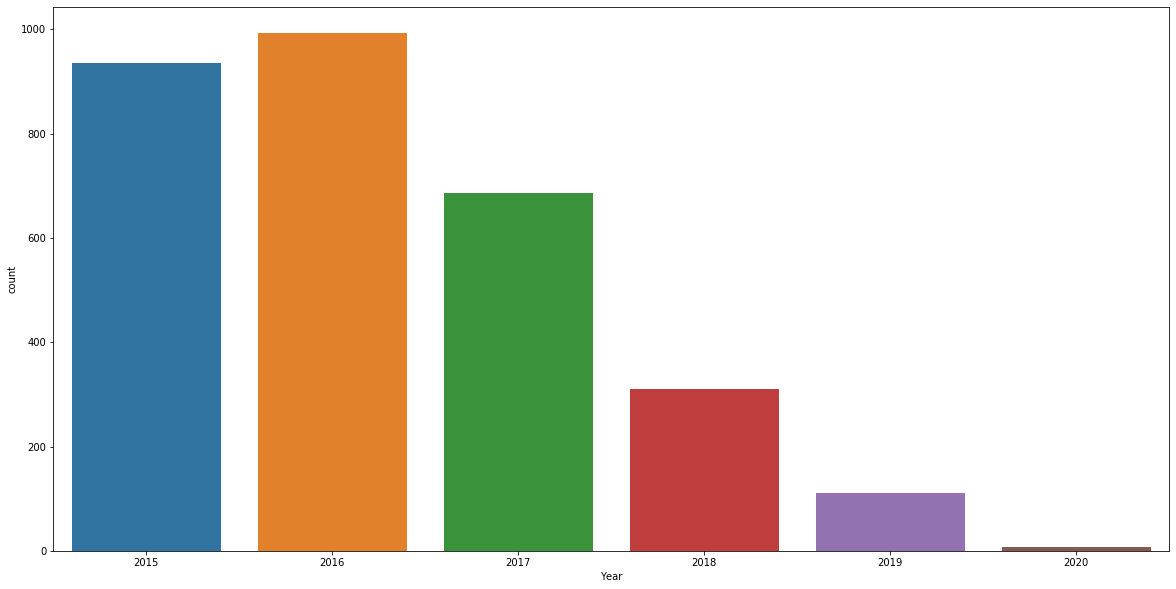

In [67]:
sns.countplot(df['Year'])
#we find 2015,2016 are the years in which maximum startup got funding but it is observe thta funding is decreasing year wise. 

In [68]:
df.set_index('Date',inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [69]:
df.head()

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentType,Funds,Year
Date,,,,,,,,
2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,2020
2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,2020
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,2020
2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2020
2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2020


In [70]:
df1=df.Funds.resample('m').count()
df1

Date
2015-01-31    40
2015-02-28    42
2015-03-31    47
2015-04-30    52
2015-05-31    44
              ..
2019-09-30     9
2019-10-31     2
2019-11-30    14
2019-12-31    10
2020-01-31     7
Freq: M, Name: Funds, Length: 61, dtype: int64

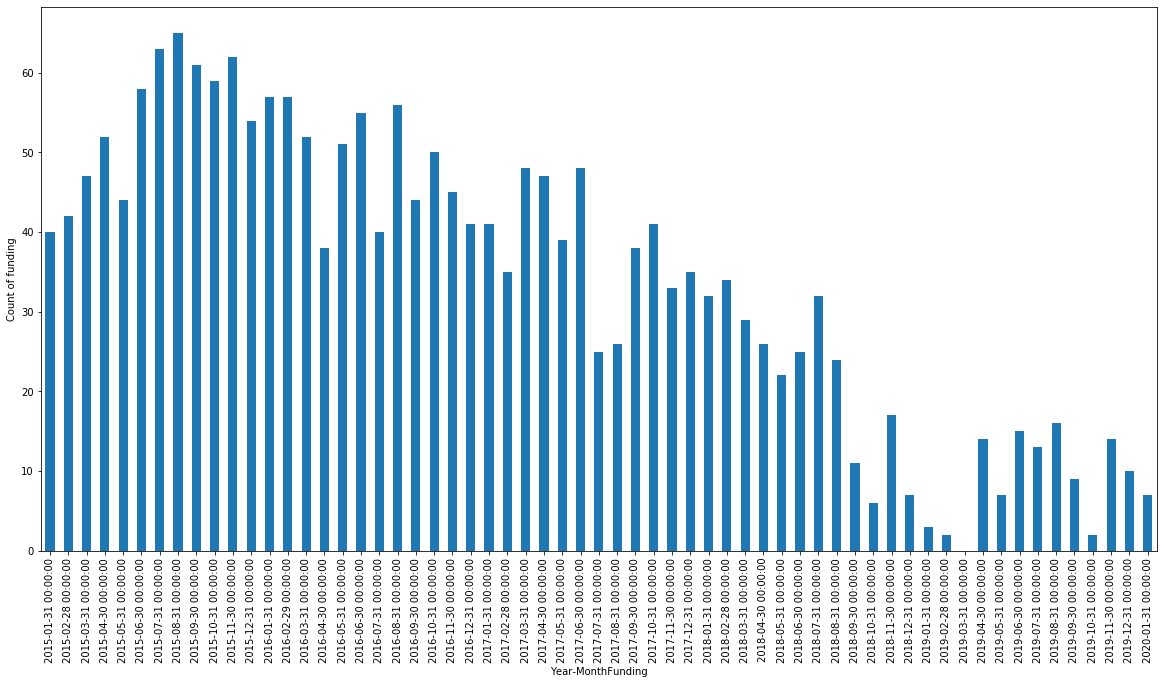

In [71]:
plt.rcParams['figure.figsize']=(20,10)
df1.plot(kind='bar')
plt.xlabel("Year-MonthFunding")
plt.ylabel("Count of funding")
plt.show()

In [72]:
#let us find which startup got highest fundin
df.describe()



,Funds,Year
count,2.066000e+03,3044.000000
mean,1.842792e+07,2016.240473
std,1.213441e+08,1.117185
min,1.600000e+04,2015.000000
25%,4.712500e+05,2015.000000
50%,1.725000e+06,2016.000000
75%,8.000000e+06,2017.000000
max,3.900000e+09,2020.000000


In [73]:
#let us find which startup got minimum funding
min_fundingstartup=df[df['Funds']==df['Funds'].min()]
min_fundingstartup

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentType,Funds,Year
Date,,,,,,,,
2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015
2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015
2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015
2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015
2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015


In [112]:
max_fundingstartup=df[df['Funds']==df['Funds'].max()]
max_fundingstartup

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentType,Funds,Year
Date,,,,,,,,
2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09,2019


In [75]:
df.describe()

,Funds,Year
count,2.066000e+03,3044.000000
mean,1.842792e+07,2016.240473
std,1.213441e+08,1.117185
min,1.600000e+04,2015.000000
25%,4.712500e+05,2015.000000
50%,1.725000e+06,2016.000000
75%,8.000000e+06,2017.000000
max,3.900000e+09,2020.000000


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text yticklabel objects>)

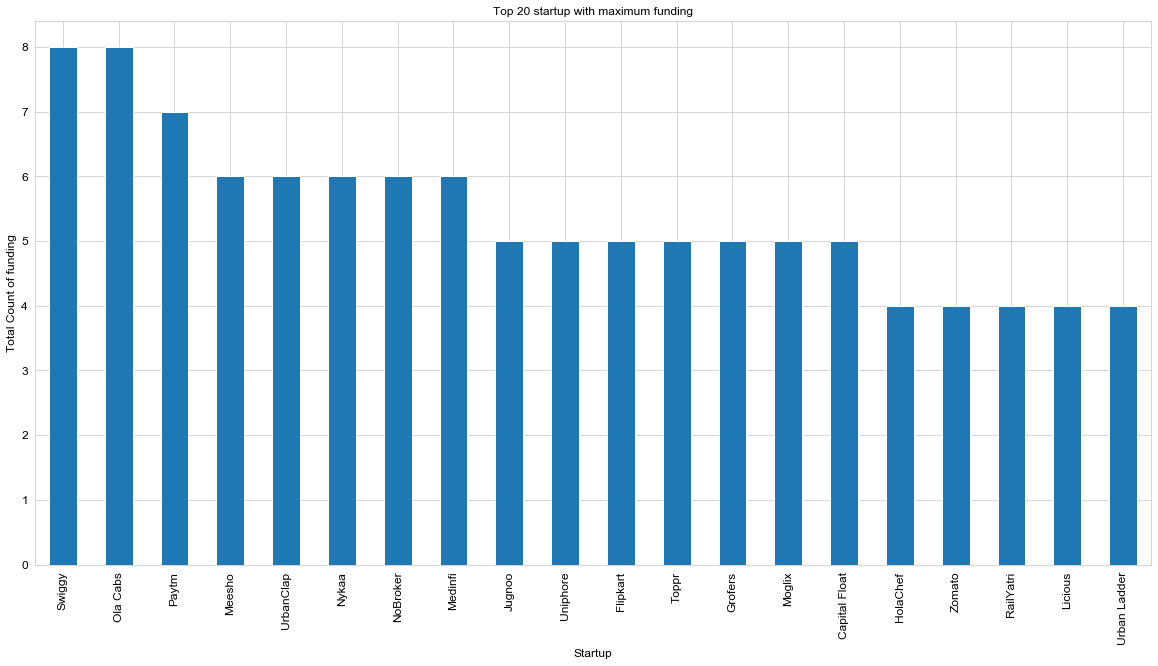

In [103]:
#now let us find top 10 startup which got more funding

df['Startup Name'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Startup',color='black',size='large')
plt.ylabel('Total Count of funding',color='black',size='large')
plt.title('Top 20 startup with maximum funding',color='black',size='large')
plt.xticks(color='black',size='large')
plt.yticks(color='black',size='large')

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text yticklabel objects>)

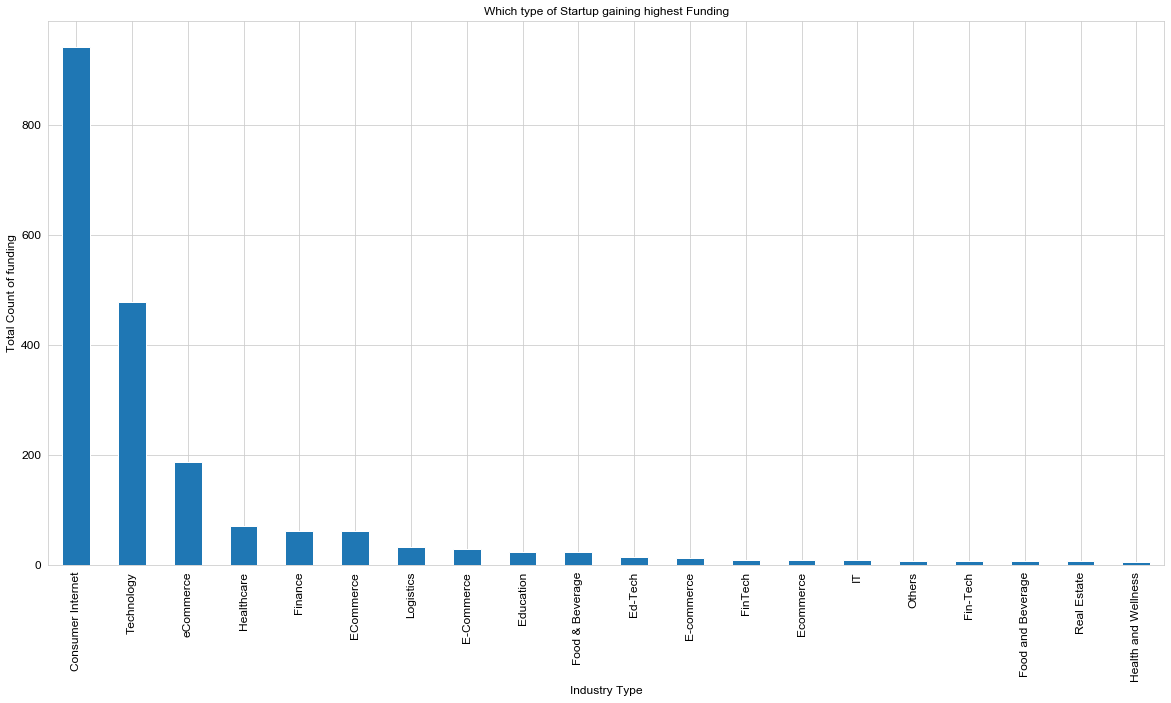

In [107]:
#let us find which industry vertical startup have maximum funding in terms of count
df['Industry Vertical'].value_counts().head(20).plot(kind='bar')
plt.title('Which type of Startup gaining highest Funding',size='large',color='black')
plt.xlabel('Industry Type',size='large',color='black')
plt.ylabel('Total Count of funding',size='large',color='black')
plt.xticks(color='black',size='large')
plt.yticks(color='black',size='large')


In [82]:
#now let us plot some more graph in tableau

In [83]:
df.head()

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentType,Funds,Year
Date,,,,,,,,
2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,2020
2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,2020
2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,2020
2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,2020
2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,2020


In [84]:
df.to_csv("startup_final.csv")